# Introduction

THis prokect analyzes data from the dating platform called OKCupid. Data science can be core of the engine which recommends matches on data platoforms. These kinds of application provide huge amounts of insightful data. 

The goal of this project is to scopre, prep, analyze, and create a machine learning model to solve a question.

The data (which is saved in `profiles.csv`) was provided by CodeCademy. 

# Scoping

## Project Goals
The goal of this project is to apply the skills and knowdlege learned in the CodeCademy Data Science track to apply a machine learning model to the data. The primary question we will answer is whether or not a person's smoking status (ie: whether or not they smoke) can be predicted from other data provided. This is useful because users don't always specify their smoking status but is can be a major factor in decision making for a prospective match. 

## Data
In this project we will be working with one data set - `profiles.csv` - which has been provided by CodeCademy. Each row in the data represents a user and contains that user's answers to a series of questions. 

## Analysis 
In this prject we will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's smkoing status, classification algorithms from the supervised learning family of machine learning models will be implemented.

## Evaluation
The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through metrics such as accuracy, precision, recall, F1 and Kappa scores.

# Import the Python Modules

First, we need to import the relevent python modules


In [112]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

%matplotlib inline

# Load Data
Load the CSV into a dataframe and explore it 

In [113]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [114]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

# Explore and Visualize Data

The graph visualises the **age** of the users. It appears that a majority of users are somewhere between their early 20s and early 30s. 

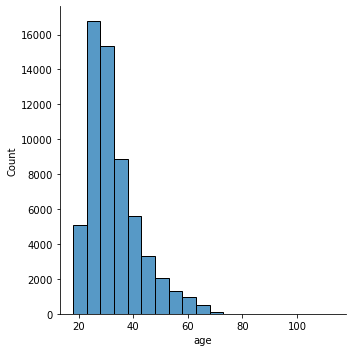

In [115]:
sns.displot(data = profiles, x = 'age', kind = 'hist', binwidth = 5)

The following graph shows the **heights** of users broken down by gender. It is clear that female users are slightly shorter
average. 

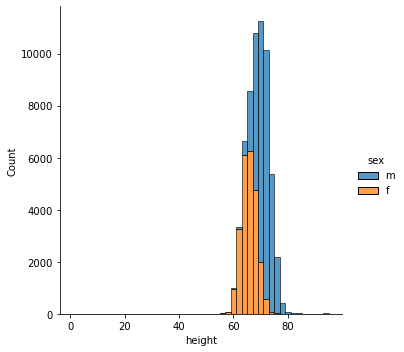

In [116]:
sns.displot(data = profiles, x = 'height', hue = 'sex', kind = 'hist', binwidth = 2, multiple = 'stack')

The following graph shows the **user-reported income** and it appears that most users have chosen to not report their income. 

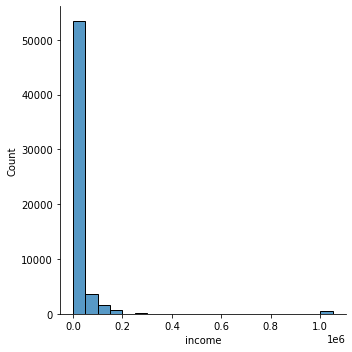

In [117]:
sns.displot(data = profiles, x = 'income', kind = 'hist', binwidth = 50000)

The following graphes shows users broken down by **sex**. It appears that there are around 35 000 men and around 25 000 women.

<AxesSubplot:xlabel='sex', ylabel='count'>

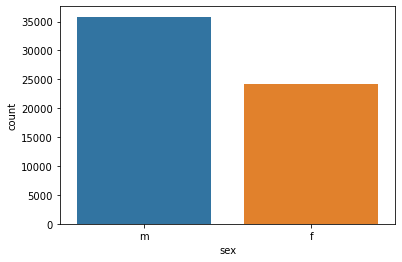

In [118]:
sns.countplot(data = profiles, x = 'sex')

The following graph shows how users describe their own **body types**.

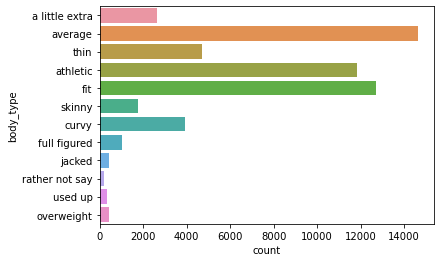

In [119]:
sns.countplot(data=profiles, y="body_type");

The following graph provides the users' info on **drinking alcohol**.

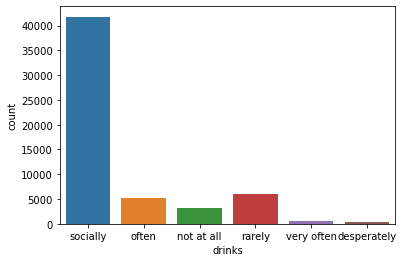

In [120]:
sns.countplot(data=profiles, x = 'drinks');

The following graph show the users' **drug user**.

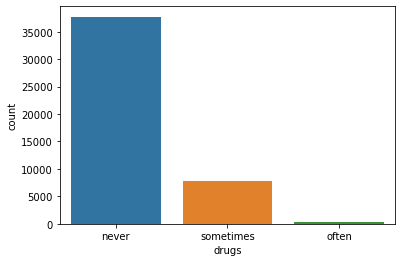

In [121]:
sns.countplot(data=profiles, x="drugs");

The following graphs provides users' smoking habits broken down by sex.

<AxesSubplot:xlabel='drugs', ylabel='count'>

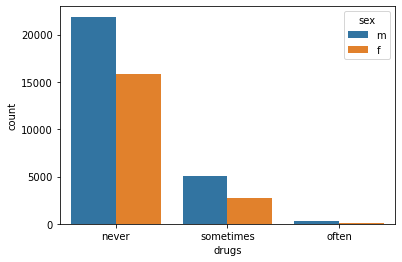

In [122]:
sns.countplot(data = profiles, x = 'drugs', hue = 'sex')

# Data Preperation

Remove missing data

In [123]:
profiles.isnull().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
orientation    False
pets            True
religion        True
sex            False
sign            True
smokes          True
speaks          True
status         False
dtype: bool

Select the variables which we hypothesize will be good predictors for smoking status and drop the NaN values.

In [150]:
columns = ['body_type', 'diet', 'drinks', 'drugs', 'sex', 'offspring', 'education', 'smokes']
new_df = profiles[columns].dropna().reset_index()
new_df = new_df[['body_type', 'diet', 'drinks', 'drugs', 'sex', 'offspring', 'education', 'smokes']]
new_df.head()

,body_type,diet,drinks,drugs,sex,offspring,education,smokes
0,a little extra,strictly anything,socially,never,m,"doesn&rsquo;t have kids, but might want them",working on college/university,sometimes
1,average,mostly other,often,sometimes,m,"doesn&rsquo;t have kids, but might want them",working on space camp,no
2,average,mostly anything,socially,never,f,"doesn&rsquo;t have kids, but wants them",graduated from college/university,no
3,thin,mostly anything,socially,never,f,"doesn&rsquo;t have kids, but wants them",working on college/university,no
4,athletic,mostly anything,socially,never,m,doesn&rsquo;t have kids,graduated from masters program,no


In [151]:
for column in columns[: -1]:
    new_df = pd.get_dummies(new_df, columns = [column], prefix = [column])
new_df.head()

,smokes,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
0,sometimes,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,no,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,no,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,no,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,no,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
new_df.smokes.value_counts()

no                10299
sometimes           787
when drinking       657
yes                 498
trying to quit      344
Name: smokes, dtype: int64

In [153]:
no_no_df = new_df[new_df.smokes != 'no']
new_df.head()

,smokes,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
0,sometimes,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,no,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,no,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,no,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,no,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have now go two dataframes. 

`new_df` contains all the data about smoking status with all the features that could influence it. 

`no_no_df` contains all the data about users who has a smoking status which isn't no. 

We will run predictive models on each of them and compare the results. 

We are starting with `new_df`

In [174]:
X = new_df.iloc[:, 1:len(new_df.columns)]
Y = new_df.iloc[:, 0:1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

X_no = no_no_df.iloc[:, 1:len(new_df.columns)]
Y_no = no_no_df.iloc[:, 0:1]

no_x_train, no_x_test, no_y_train, no_y_test = train_test_split(X_no, Y_no, test_size = 0.2, random_state = 10)

no_y_train = no_y_train.to_numpy().ravel()
no_y_test = no_y_test.to_numpy().ravel()


# Predictions

We will use 2 models on each dataframe - K Nearest Nieghbor and Decision Tree. 


In [175]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
knn_predictions = knn_model.predict(x_train)
print(classification_report(y_train, knn_predictions))

                precision    recall  f1-score   support

            no       0.84      0.99      0.91      8229
     sometimes       0.51      0.12      0.20       633
trying to quit       0.56      0.07      0.12       273
 when drinking       0.48      0.07      0.13       526
           yes       0.57      0.15      0.23       407

      accuracy                           0.83     10068
     macro avg       0.59      0.28      0.32     10068
  weighted avg       0.78      0.83      0.78     10068



In [176]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(no_x_train, no_y_train)
knn_predictions = knn_model.predict(no_x_train)
print(classification_report(no_y_train, knn_predictions))

                precision    recall  f1-score   support

     sometimes       0.51      0.78      0.62       612
trying to quit       0.50      0.37      0.43       279
 when drinking       0.59      0.54      0.56       524
           yes       0.64      0.32      0.43       413

      accuracy                           0.54      1828
     macro avg       0.56      0.50      0.51      1828
  weighted avg       0.56      0.54      0.53      1828



In [177]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_predictions = dt_model.predict(x_train)
print(classification_report(y_train, dt_predictions))

                precision    recall  f1-score   support

            no       0.93      1.00      0.96      8229
     sometimes       0.91      0.64      0.75       633
trying to quit       0.96      0.64      0.77       273
 when drinking       0.97      0.55      0.70       526
           yes       0.98      0.77      0.86       407

      accuracy                           0.93     10068
     macro avg       0.95      0.72      0.81     10068
  weighted avg       0.93      0.93      0.93     10068



In [178]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
print(classification_report(y_test, dt_predictions))

                precision    recall  f1-score   support

            no       0.86      0.90      0.88      2070
     sometimes       0.15      0.13      0.14       154
trying to quit       0.09      0.07      0.08        71
 when drinking       0.10      0.06      0.08       131
           yes       0.16      0.13      0.14        91

      accuracy                           0.76      2517
     macro avg       0.27      0.26      0.26      2517
  weighted avg       0.73      0.76      0.74      2517



In [179]:
dt_model = DecisionTreeClassifier().fit(no_x_train, no_y_train)
dt_predictions = dt_model.predict(no_x_train)
print(classification_report(no_y_train, dt_predictions))

                precision    recall  f1-score   support

     sometimes       0.85      0.97      0.90       612
trying to quit       0.91      0.87      0.89       279
 when drinking       0.93      0.86      0.90       524
           yes       0.98      0.89      0.93       413

      accuracy                           0.91      1828
     macro avg       0.92      0.90      0.90      1828
  weighted avg       0.91      0.91      0.91      1828



# Conclusion
From our models it appears that the Decision Tree with the non_smokers incuded offers the best results and with an accuracy of 76% it can be used to predict smoking status of users. 